In [14]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

In [15]:
# start_date = '2023-4-10' # start of MAGS history
# start_date = '2023-1-1' # start of uptrend
start_date = '2021-1-1' # start of downtrend

symbol = 'SMH3.L'
tickerData = yf.Ticker(symbol)
history = tickerData.history(interval='1d', start=start_date, end=date.today()) # prices are adjusted for splits
history['SMA200'] = history['Close'].rolling(window=200).mean()
history['SMA200_distance'] = history.Close / history.SMA200 - 1
history['SMA50'] = history['Close'].rolling(window=50).mean()
history['SMA50_distance'] = history.Close / history.SMA50 - 1

display(history)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,SMA200,SMA200_distance,SMA50,SMA50_distance
Date,,,,,,,,,,,,
2021-12-10 00:00:00+00:00,4.99971,4.99971,4.99971,4.99971,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-12-13 00:00:00+00:00,4.60104,4.60104,4.60104,4.60104,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-12-14 00:00:00+00:00,4.41450,4.41450,4.41450,4.41450,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-12-15 00:00:00+00:00,4.51300,4.51300,4.51300,4.51300,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-12-16 00:00:00+00:00,5.18000,5.18000,5.18000,5.18000,100,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28 00:00:00+00:00,5.43170,5.71030,5.33210,5.32925,563,0.0,0.0,0.0,5.372819,-0.008109,4.990877,0.067798
2024-10-29 00:00:00+00:00,5.31090,5.54910,5.29040,5.53245,2647,0.0,0.0,0.0,5.386467,0.027102,4.990725,0.108546
2024-10-30 00:00:00+00:00,5.50530,5.50530,5.00000,5.26755,3276,0.0,0.0,0.0,5.399050,-0.024356,4.984484,0.056789


In [16]:
def temperature(series):
    series = series.dropna()
    if len(series) == 0:
        return None
    return (series <= series.iloc[-1]).mean()


In [17]:
print('SMA50:', temperature(history.SMA50_distance))
print('SMA200:', temperature(history.SMA200_distance))
print('SMA50 - 0:', (history.SMA50_distance.dropna() <= 0).mean())
print('SMA200 - 0:', (history.SMA200_distance.dropna() <= 0).mean())

SMA50: 0.4411764705882353
SMA200: 0.19811320754716982
SMA50 - 0: 0.4411764705882353
SMA200 - 0: 0.24150943396226415


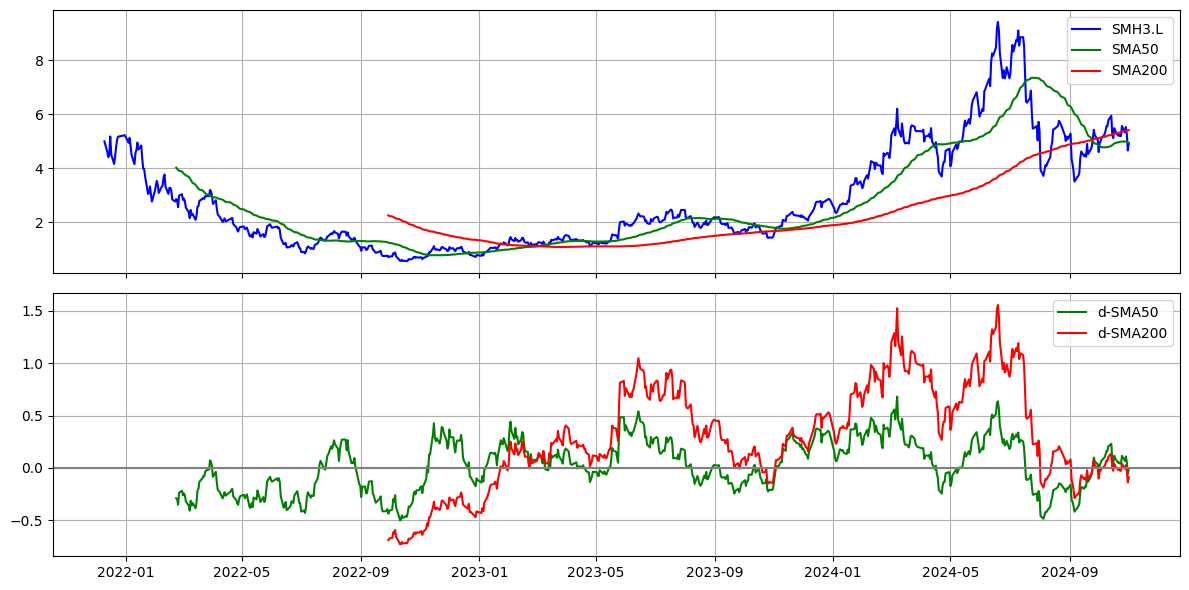

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

ax1.plot(history.Close, color='blue', label=symbol)
ax1.plot(history.SMA50, color='green', label='SMA50')
ax1.plot(history.SMA200, color='red', label='SMA200')
ax1.legend()
ax1.grid()

ax2.plot(history.SMA50_distance, color='green', label='d-SMA50')
ax2.plot(history.SMA200_distance, color='red', label='d-SMA200')
ax2.axhline(y=0, color='gray')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()